In [13]:
import numpy as np
from numpy import zeros
import numpy.polynomial.chebyshev as C
from scipy.linalg import solve

def laplace_solve(x, f, k=0):
    """
    Laplacian solve with mixed derivatives on boundary of the form
    
    u_z + k u = 0
    
    this is used for the vorticity inversion in Xing
    """
    
    a = 0
    b = 0
    
    n = x.shape[0]-1

    # x does not need to be (-1,1)
    scal = 2/(x.max()-x.min()) 
    xx = (x-x.min())/(x.max()-x.min()) * 2 -1

    # Identity matrix   
    I = np.eye(n+1)

    # derivative matrices (n+1)x(n-1)
    D = C.chebder(I,1, scl=scal)
    D2 = C.chebder(I,2, scl=scal)

    # Chebshev Vandermonde matrix
    V = C.chebvander(xx,n)


    # Transform forcing function to mode space
    fhat = solve(V,f)

    # Boundary operators for last two rows (tau conditions)
    # First and last rows of Vandermonde contain the boundary
    # values of the Chebyshev polynomials  
    B = zeros((2, V.shape[1]))
    B[0,:] = V[0,:]
    B[1,:] = k* V[-1,:] + C.chebval(1.0, D)

    # Left-hand-side
    A = -D2
    L = np.vstack((A,B))

    # Insert boundary values into the last two elements of 
    # the right-hand-side
    fhat[-2] = a
    fhat[-1] = b

    # Compute expansion coefficients of the solution
    yhat = solve(L,fhat)

    # Transform solution to point space
    y = V.dot(yhat)
    
    return y

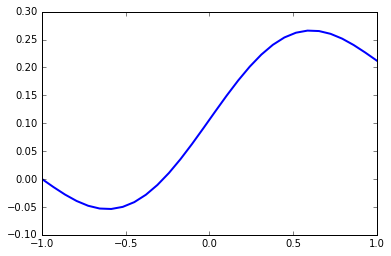

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
# Chebyshev-Gauss-Lobatto points
x= np.linspace(-1,1,30)
# Forcing function 
f = 1 + np.tanh(4*x)
f = np.sin(np.pi*x)
y=laplace_solve(x,f, k=1)

# Plot solution
plt.plot(x,y,lw=2)
plt.show()